# Topic Modelling with Latent Dirichlet Allocation

In this notebook we present a simple application of Latent Dirichlet Allocation for topic modelling with ScikitLearn on the BBC Full Text Document Classification from Kaggle ([info here](https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)).

### 1. Get Data

In [2]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: evangelosantypas
Your Kaggle Key: ··········


100%|██████████| 5.59M/5.59M [00:00<00:00, 5.92MB/s]


### 2. Load Data

In [6]:
import os
path = '/content/bbc-full-text-document-classification/bbc'
folder = os.listdir(path)
folder

['sport', 'politics', 'entertainment', 'README.TXT', 'tech', 'business']

In [9]:
class_labels = {'politics':0, 'sport':1,  'tech':2, 'entertainment':3, 'business':4}

In [10]:
def read_extract_text_file(path):
    with open(path,'r',encoding='latin-1') as file:
        data = file.readlines()
        text_data= " ".join(data)
    return text_data


In [11]:
# Make dataset
final_text = []
final_label = []

for label in folder:

    new_path = os.path.join(path,label)
    if new_path.endswith("README.TXT"): # Ignore README.TXT
        continue
    else:
        for j in os.listdir(new_path):
            new_path1 = os.path.join(new_path,j)
            text = read_extract_text_file(new_path1)
            final_text.append(text)
            final_label.append(class_labels[label])

In [13]:
# Make data frame
df = pd.DataFrame()
df['Text'] = final_text
df['Label'] = final_label
df.shape

(2225, 2)

### 3. Count Vectorizer

In [14]:
import nltk
import textwrap

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stops = set(stopwords.words('english'))
stops = stops.union({
    'said', 'would', 'could', 'told', 'also', 'one', 'two',
    'mr', 'new', 'year',
})
stops = list(stops) # required for later version of CountVectorizer
stops[0:10]

['below', "you've", 'whom', 'my', 'he', 'so', "hasn't", 'own', 'those', 'ours']

In [25]:
# Count Vectorizer
vectorizer = CountVectorizer(stop_words=stops)



X = vectorizer.fit_transform(df['Text'])

### 4. LDA

In [26]:
lda = LatentDirichletAllocation(
    n_components=10, # default: 10
    random_state=12345,
)

lda.fit(X)



LatentDirichletAllocation(random_state=12345)

In [28]:
import matplotlib.pyplot as plt


def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

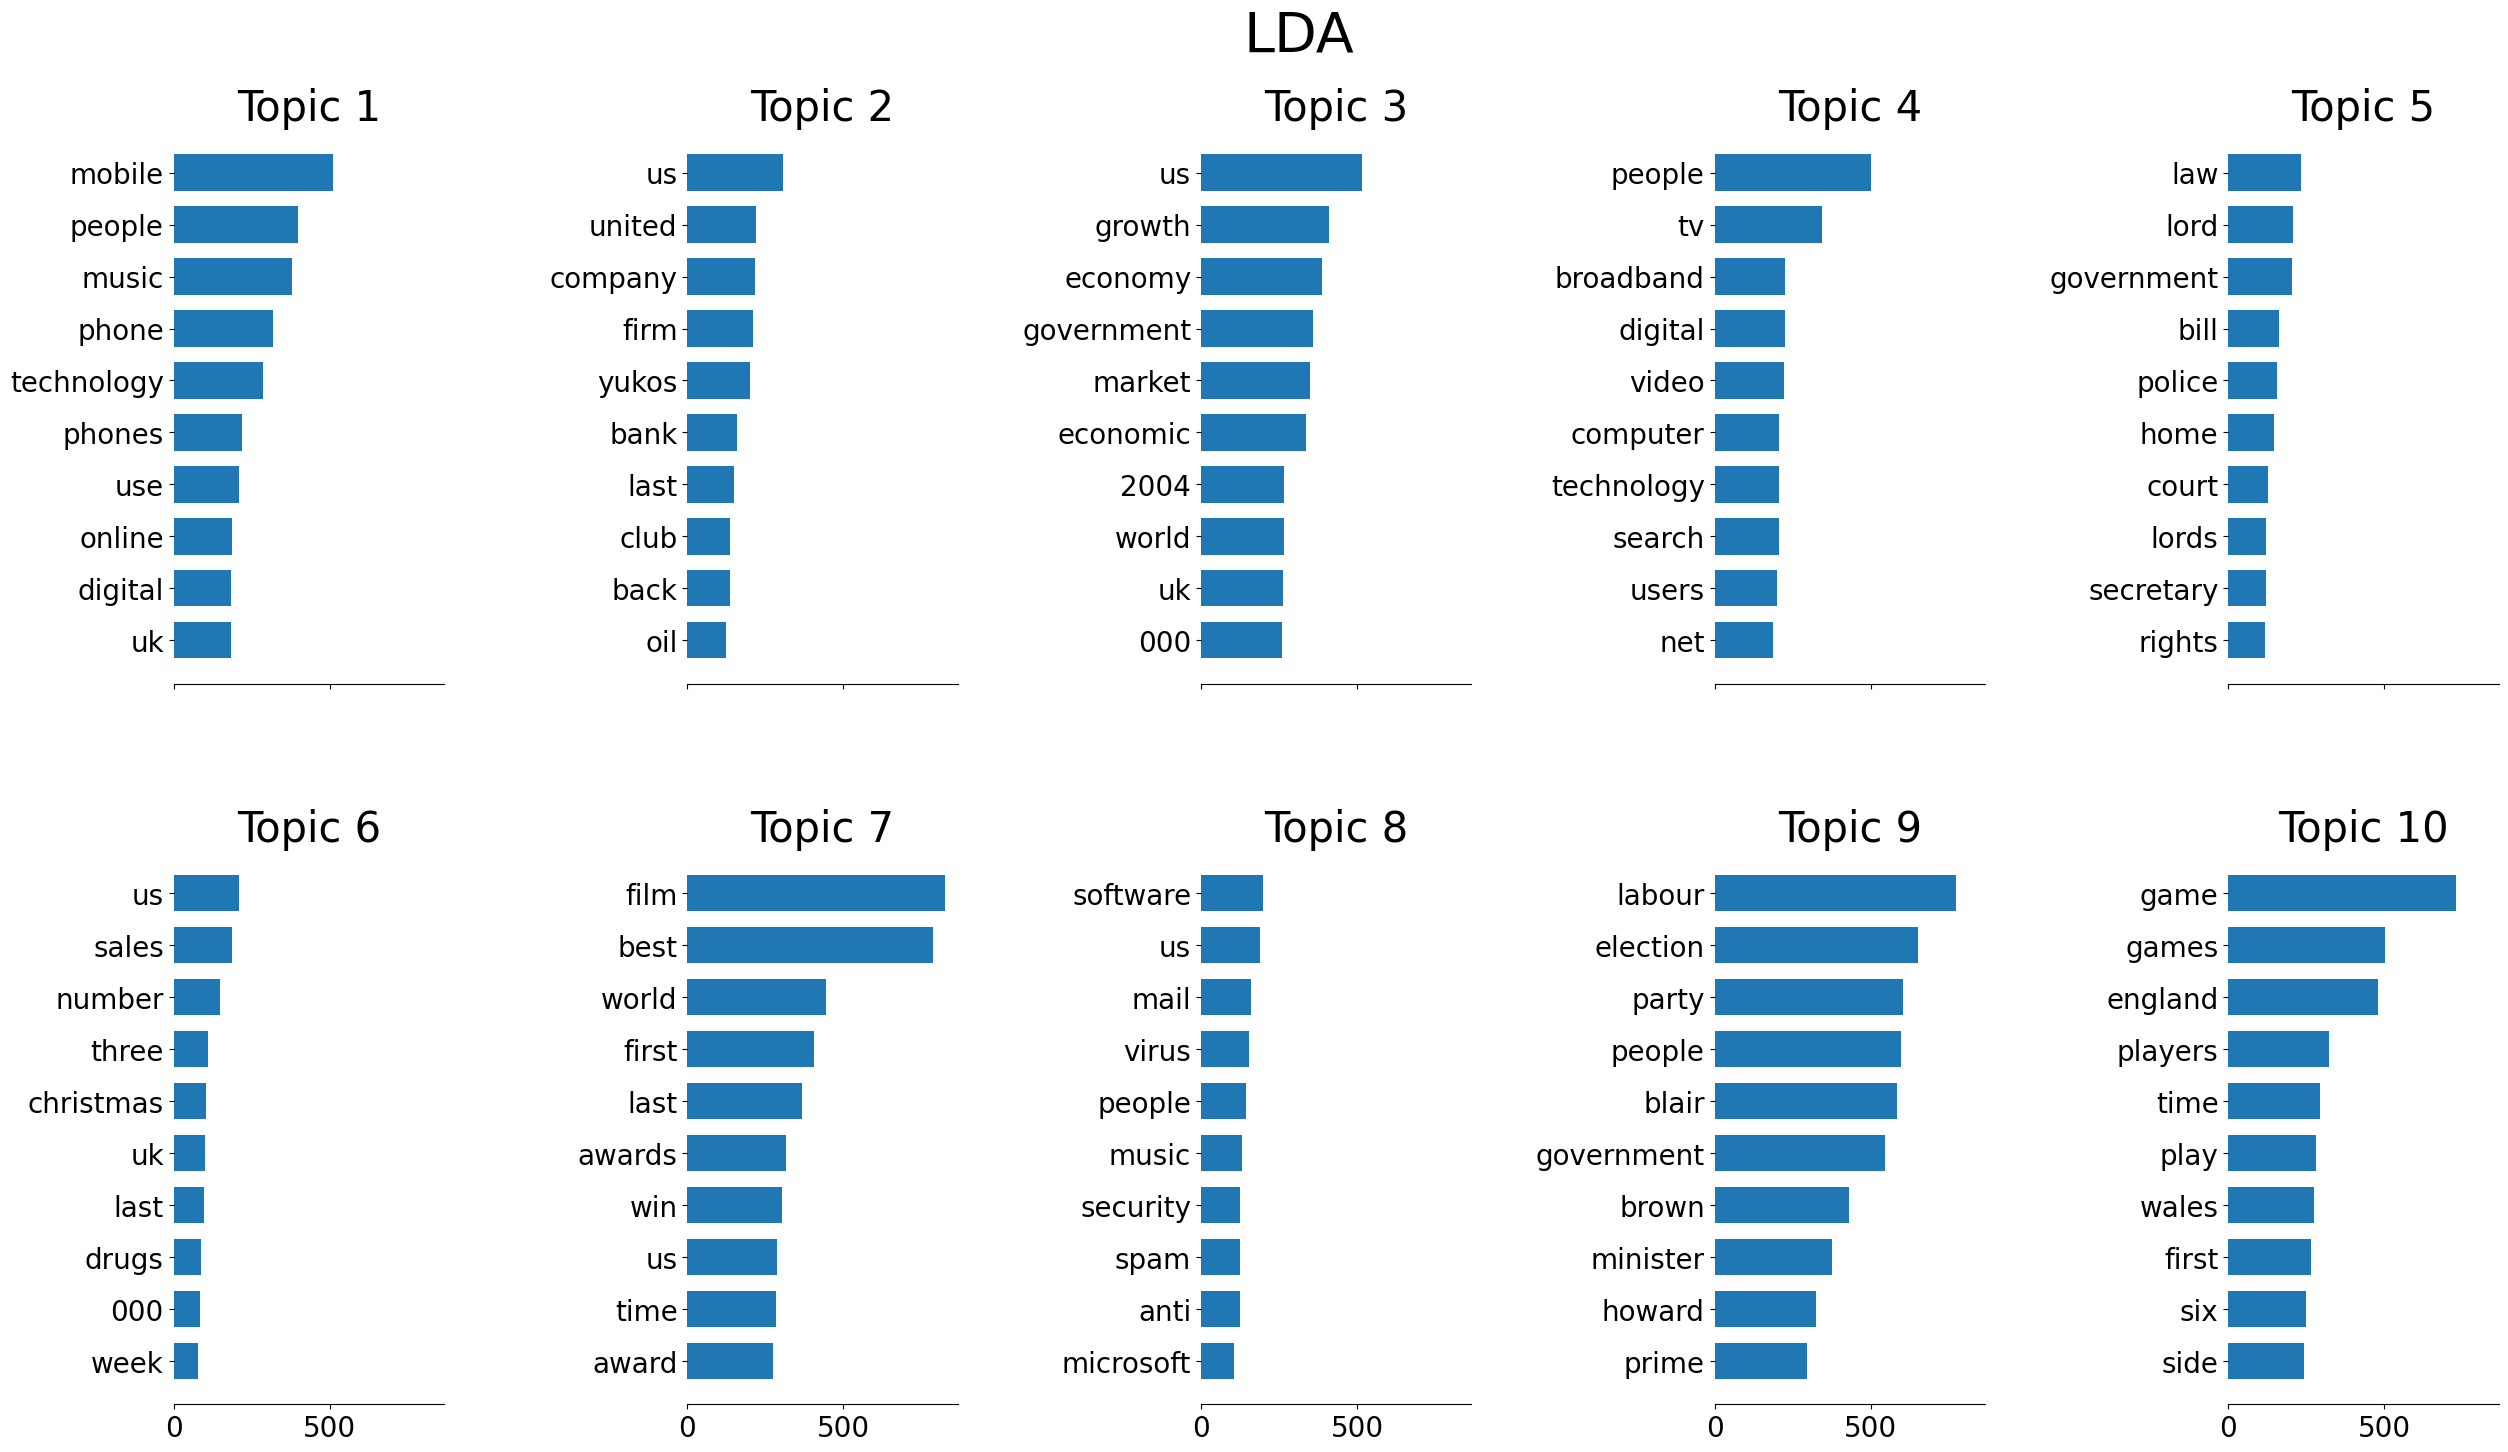

In [29]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names);



In [30]:
Z = lda.transform(X)

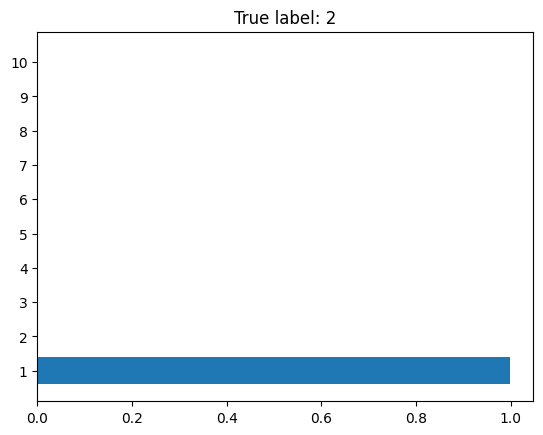

In [34]:
# Pick a random document
# Check which "topics" are associated with it
# Are they related to the true label?

import numpy as np

np.random.seed(0)
i = np.random.choice(len(df))
z = Z[i]
topics = np.arange(10) + 1

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['Label']);

In [35]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

print(wrap(df.iloc[i]['Text']))

Rings of steel combat net attacks
 
 Gambling is hugely popular,
especially with tech-savvy criminals.
 
 Many extortionists are
targeting net-based betting firms and threatening to cripple their
websites with deluges of data unless a ransom is paid.  But now deep
defences are being put in place by some of the UK's biggest net firms
to stop these attacks.  Increasing numbers of attacks and the huge
amounts of data being used to try to bump a site off the web are
prompting firms to adopt the measures.  "Net firms are realising that
it's not just about anti-virus and firewalls," said Paul King, chief
security architect at Cisco.  "There are more things that can be done
in the network to protect data centres."  Mr King said the only way to
properly combat these so-called Distributed Denial-of-Service attacks
was with intelligent net-based systems.  Many of the gambling sites
suffering DDoS attacks are in offshore data and hosting centres, so
any large scale data flood could knock out acce

Text(0.5, 1.0, 'True label: 0')

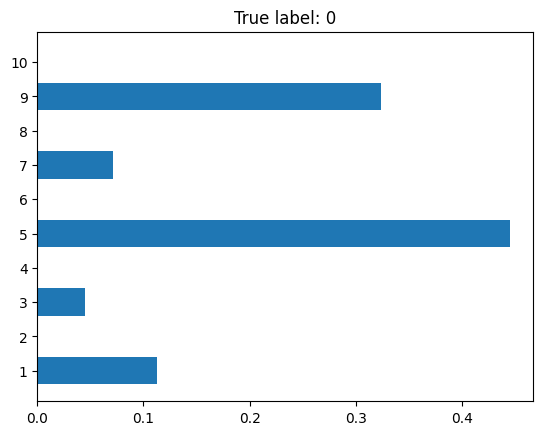

In [37]:
i = np.random.choice(len(df))
z = Z[i]

fig, ax = plt.subplots()
ax.barh(topics, z)
ax.set_yticks(topics)
ax.set_title('True label: %s' % df.iloc[i]['Label'])